<a href="https://colab.research.google.com/github/artem-dorofeev/py_DataScience_HW/blob/main/HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнє завдання


В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.


Вам належить запропонувати свою власну архітектуру мережі. Точність найнаївнішої, але адекватної нейромережі становить приблизно 91%. Точність вашої моделі повинна бути не нижчою за цей показник. Щоб досягти таких значень вам знадобиться поекспериментувати з гіперпараметрами мережі:


    кількість шарів;
    кількість нейронів;
    функції активації;
    кількість епох;
    розмір батчу;
    вибір оптимізатора;
    різні техніки регуляризації і т.д.


Використайте вивчені техніки виявлення проблем навчання нейронної мережі, і потім поекспериментуйте.


Рішення оформіть у вигляді окремого ноутбука.

In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist

In [37]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [39]:
# базова моель
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='ReLU'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Точність на тестових даних:', test_acc)

train_loss, train_acc = model.evaluate(train_images, train_labels)
print('Точність на тренувальних даних:', train_acc)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5342 - accuracy: 0.8105
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4013 - accuracy: 0.8544
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3674 - accuracy: 0.8664
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3451 - accuracy: 0.8731
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3320 - accuracy: 0.8787
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3182 - accuracy: 0.8825
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3067 - accuracy: 0.8853
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3001 - accuracy: 0.8883
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2911 - accuracy: 0.8922
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3367 

In [47]:
# вибір кількості епох - метод ранньої зупинки (early stopping)  val_accuracy
from tensorflow.keras.callbacks import EarlyStopping


# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# model.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=[early_stopping])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)

history = model.fit(train_images, train_labels, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Точність на тестових даних:', test_acc)

train_loss, train_acc = model.evaluate(train_images, train_labels)
print('Точність на тренувальних даних:', train_acc)

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2427 - accuracy: 0.9067 - val_loss: 0.2695 - val_accuracy: 0.9033
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2347 - accuracy: 0.9096 - val_loss: 0.2638 - val_accuracy: 0.9053
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2334 - accuracy: 0.9106 - val_loss: 0.2828 - val_accuracy: 0.9011
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2285 - accuracy: 0.9129 - val_loss: 0.2654 - val_accuracy: 0.9043
Epoch 5/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2255 - accuracy: 0.9142 - val_loss: 0.2732 - val_accuracy: 0.9012
Epoch 6/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2230 - accuracy: 0.9160 - val_loss: 0.2648 - val_accuracy: 0.9072
Epoch 7/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2197 - accuracy: 0.9150 - val_loss: 0.2744 - val_accuracy:

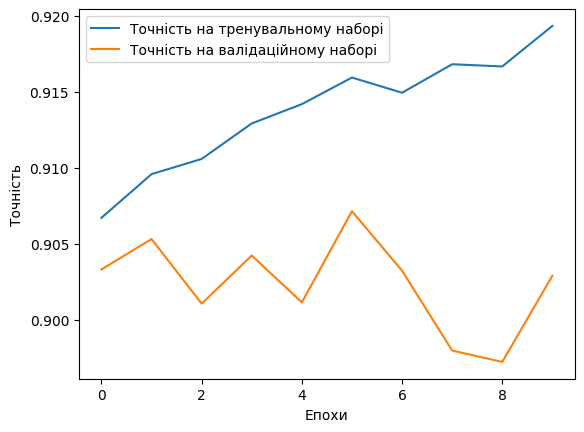

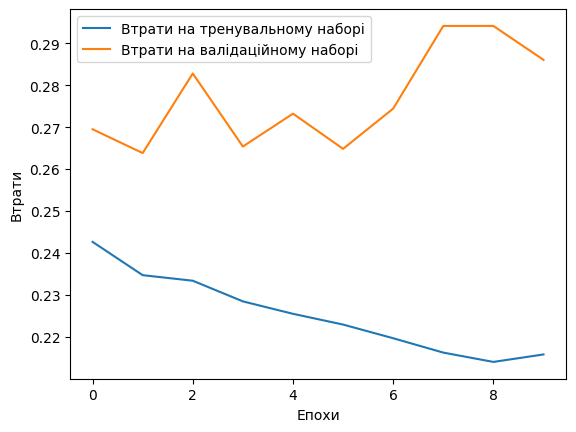

In [48]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Точність на тренувальному наборі')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційному наборі')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Втрати на тренувальному наборі')
plt.plot(history.history['val_loss'], label='Втрати на валідаційному наборі')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.show()


In [52]:
# вибір кількості епох - метод ранньої зупинки (early stopping) val_loss


early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=[early_stopping])

# early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)

# history = model.fit(train_images, train_labels, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Точність на тестових даних:', test_acc)

train_loss, train_acc = model.evaluate(train_images, train_labels)
print('Точність на тренувальних даних:', train_acc)

Epoch 1/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4105 - accuracy: 0.8498 - val_loss: 0.3712 - val_accuracy: 0.8641
Epoch 2/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3735 - accuracy: 0.8653 - val_loss: 0.3587 - val_accuracy: 0.8712
Epoch 3/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3462 - accuracy: 0.8727 - val_loss: 0.3505 - val_accuracy: 0.8679
Epoch 4/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3286 - accuracy: 0.8780 - val_loss: 0.3387 - val_accuracy: 0.8780
Epoch 5/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3173 - accuracy: 0.8839 - val_loss: 0.3246 - val_accuracy: 0.8819
Epoch 6/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3010 - accuracy: 0.8884 - val_loss: 0.3484 - val_accuracy: 0.8763
Epoch 7/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2941 - accuracy: 0.8911 - val_loss: 0.3176 - val_accu

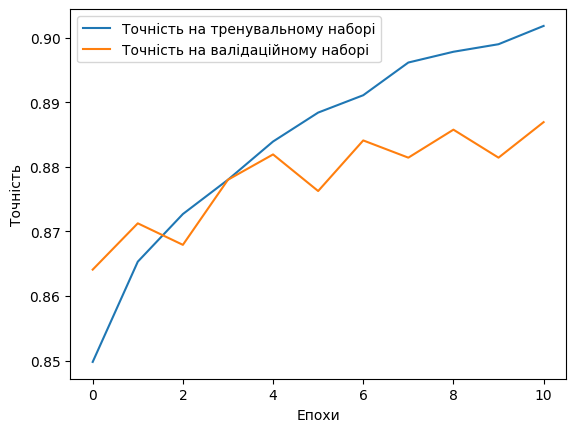

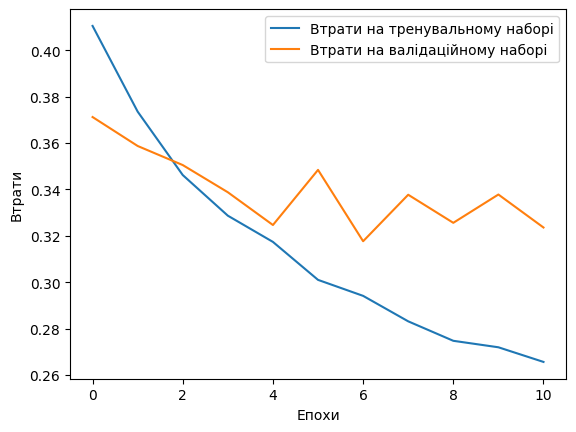

In [53]:
plt.plot(history.history['accuracy'], label='Точність на тренувальному наборі')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційному наборі')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Втрати на тренувальному наборі')
plt.plot(history.history['val_loss'], label='Втрати на валідаційному наборі')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.show()

In [54]:
# збільшемо кількість шарів

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='ReLU'),  # Збільшення кількості нейронів
    layers.Dropout(0.1),
    layers.Dense(128, activation='ReLU'),  # Додатковий Dense шар
    layers.Dropout(0.1),
    layers.Dense(64, activation='ReLU'),   # Додатковий Dense шар
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)

history = model.fit(train_images, train_labels, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Точність на тестових даних:', test_acc)

train_loss, train_acc = model.evaluate(train_images, train_labels)
print('Точність на тренувальних даних:', train_acc)

Epoch 1/50
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5550 - accuracy: 0.8000 - val_loss: 0.4163 - val_accuracy: 0.8511
Epoch 2/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4080 - accuracy: 0.8499 - val_loss: 0.3761 - val_accuracy: 0.8596
Epoch 3/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3742 - accuracy: 0.8645 - val_loss: 0.3617 - val_accuracy: 0.8688
Epoch 4/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3508 - accuracy: 0.8714 - val_loss: 0.3565 - val_accuracy: 0.8692
Epoch 5/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3290 - accuracy: 0.8800 - val_loss: 0.3736 - val_accuracy: 0.8662
Epoch 6/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3176 - accuracy: 0.8816 - val_loss: 0.3334 - val_accuracy: 0.8783
Epoch 7/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3041 - accuracy: 0.8877 - val_loss: 0.3289 - val_accu

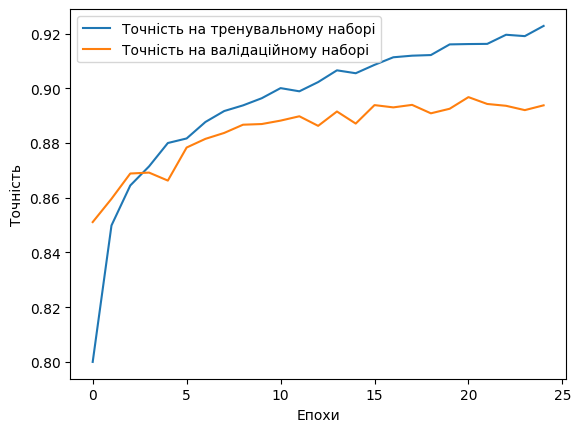

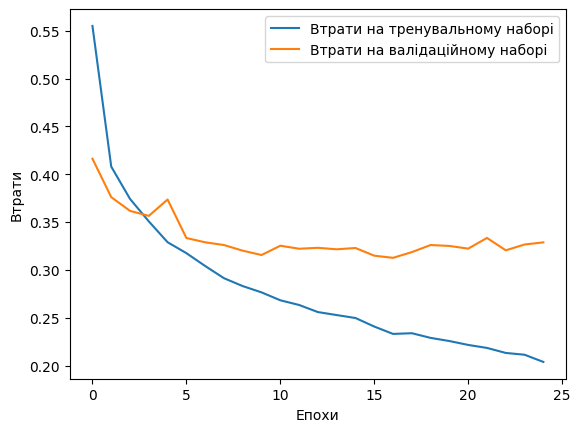

In [55]:
plt.plot(history.history['accuracy'], label='Точність на тренувальному наборі')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційному наборі')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Втрати на тренувальному наборі')
plt.plot(history.history['val_loss'], label='Втрати на валідаційному наборі')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.show()

In [56]:
# змінемо оптимізатор на rmsprop
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='ReLU'),  # Збільшення кількості нейронів
    layers.Dropout(0.1),
    layers.Dense(128, activation='ReLU'),  # Додатковий Dense шар
    layers.Dropout(0.1),
    layers.Dense(64, activation='ReLU'),   # Додатковий Dense шар
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)

history = model.fit(train_images, train_labels, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Точність на тестових даних:', test_acc)

train_loss, train_acc = model.evaluate(train_images, train_labels)
print('Точність на тренувальних даних:', train_acc)

Epoch 1/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5739 - accuracy: 0.7950 - val_loss: 0.4172 - val_accuracy: 0.8503
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4358 - accuracy: 0.8472 - val_loss: 0.3943 - val_accuracy: 0.8620
Epoch 3/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4097 - accuracy: 0.8578 - val_loss: 0.3837 - val_accuracy: 0.8638
Epoch 4/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4085 - accuracy: 0.8598 - val_loss: 0.4093 - val_accuracy: 0.8647
Epoch 5/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4055 - accuracy: 0.8648 - val_loss: 0.3835 - val_accuracy: 0.8733
Epoch 6/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4088 - accuracy: 0.8650 - val_loss: 0.3870 - val_accuracy: 0.8676
Epoch 7/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4078 - accuracy: 0.8669 - val_loss: 0.3867 - val_accu

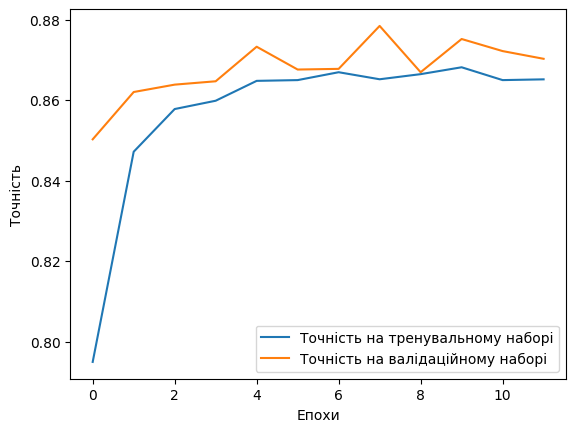

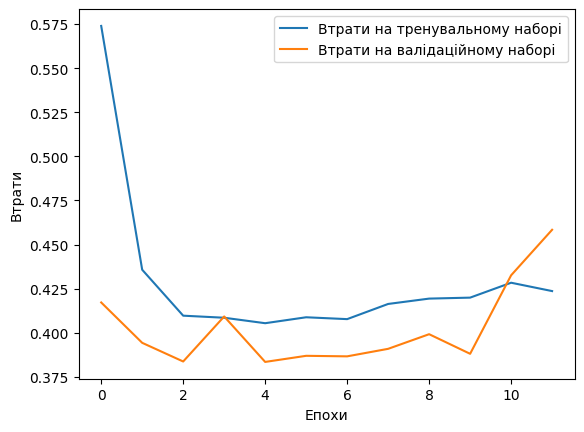

In [57]:
plt.plot(history.history['accuracy'], label='Точність на тренувальному наборі')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційному наборі')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Втрати на тренувальному наборі')
plt.plot(history.history['val_loss'], label='Втрати на валідаційному наборі')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.show()

*зміна обтимізатора на rmsprop погіршала модель*

In [58]:
# змінемо оптимізатор на sgd
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='ReLU'),  # Збільшення кількості нейронів
    layers.Dropout(0.1),
    layers.Dense(128, activation='ReLU'),  # Додатковий Dense шар
    layers.Dropout(0.1),
    layers.Dense(64, activation='ReLU'),   # Додатковий Dense шар
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)

history = model.fit(train_images, train_labels, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Точність на тестових даних:', test_acc)

train_loss, train_acc = model.evaluate(train_images, train_labels)
print('Точність на тренувальних даних:', train_acc)

Epoch 1/50
1500/1500 [==============================] - 9s 5ms/step - loss: 0.9157 - accuracy: 0.6760 - val_loss: 0.5558 - val_accuracy: 0.8061
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5769 - accuracy: 0.7968 - val_loss: 0.4759 - val_accuracy: 0.8354
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5054 - accuracy: 0.8228 - val_loss: 0.4436 - val_accuracy: 0.8403
Epoch 4/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4645 - accuracy: 0.8380 - val_loss: 0.4108 - val_accuracy: 0.8519
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4334 - accuracy: 0.8469 - val_loss: 0.3979 - val_accuracy: 0.8544
Epoch 6/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4136 - accuracy: 0.8539 - val_loss: 0.3853 - val_accuracy: 0.8633
Epoch 7/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3977 - accuracy: 0.8609 - val_loss: 0.3678 - val_accuracy:

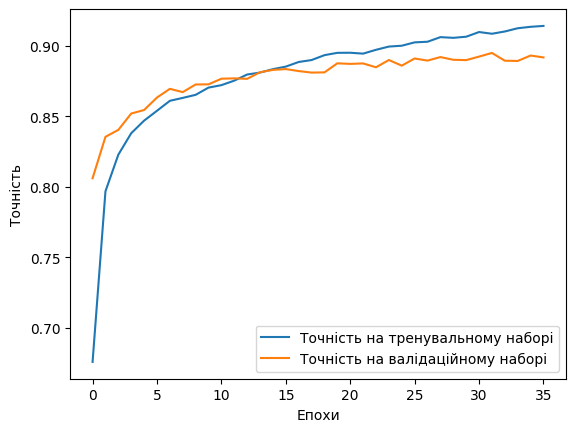

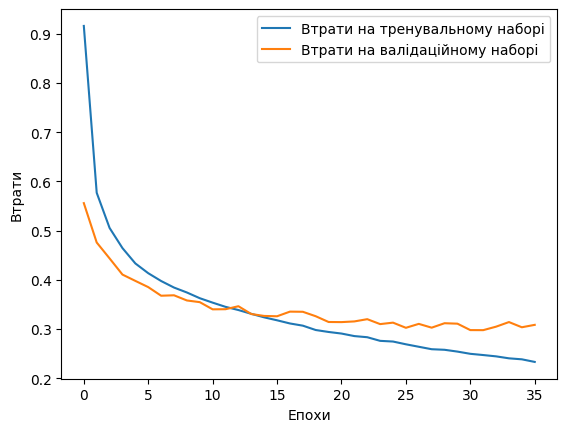

In [59]:
plt.plot(history.history['accuracy'], label='Точність на тренувальному наборі')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційному наборі')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Втрати на тренувальному наборі')
plt.plot(history.history['val_loss'], label='Втрати на валідаційному наборі')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.show()